In [1]:
# ----------------------------------------------------------------------
# **Part 1: File Set Up**
# ----------------------------------------------------------------------

#===========DEPENDENCIES=============
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import requests

pd.set_option('display.max_columns', None)

In [2]:
#============IMPORT==============
csv_file_path = os.path.join('Resources', 'accidents_2014.csv')
traffic_df = pd.read_csv(csv_file_path)

In [3]:
#============DROP BLANK COLUMNS===========

traffic_df.dropna(
    axis=1,
    how='all',
    inplace=True
)

#============DROP BLANK ROWS WITH BLANK VALUES==========

traffic_df['Junction_Control'].replace(
    np.nan, 'None', inplace=True)

traffic_df.replace(
    '', np.nan, inplace=True)

traffic_df.replace(
    'Unknown', np.nan, inplace=True)

traffic_df.dropna(axis=0, inplace=True)

#===========REPLACING ERRANT/MISPELLED VALUES===============

traffic_df['Light_Conditions'].replace(
    'Darkeness: No street lighting',
    'Darkness: No street lighting', 
    inplace=True
)

traffic_df['Pedestrian_Crossing-Physical_Facilities'].replace(
    'non-junction pedestrian crossing',
    'Non-junction Pedestrian Crossing', 
    inplace=True
)

#===========RENAMING COLUMNS===============

traffic_df.rename(columns=
    {'Accident_Index' : 'Accident Index',
     'Longitude' : 'Longitude', 
     'Latitude' : 'Latitude', 
     'Police_Force' : 'Police Force', 
     'Accident_Severity' : 'Accident Severity', 
     'Number_of_Vehicles' : 'Number of Vehicles', 
     'Number_of_Casualties' : 'Number of Casualties', 
     'Date' : 'Date', 
     'Day_of_Week' : 'Day of Week', 
     'Time' : 'Time', 
     'Local_Authority_(District)' : 'Local Authority District', 
     'Local_Authority_(Highway)' : 'Local Authority Highway', 
     '1st_Road_Class' : '1st Road Class', 
     '1st_Road_Number' : '1st Road Number', 
     'Road_Type' : 'Road Type', 
     'Speed_limit' : 'Speed Limit', 
     'Junction_Control' : 'Junction Control', 
     '2nd_Road_Class' : '2nd Road Class', 
     '2nd_Road_Number' : '2nd Road Number', 
     'Pedestrian_Crossing-Human_Control' : 'Pedestrian Crossing Human Control', 
     'Pedestrian_Crossing-Physical_Facilities' : 'Pedestrian Crossing Physical Facilities', 
     'Light_Conditions' : 'Light Conditions', 
     'Weather_Conditions' : 'Weather Conditions', 
     'Road_Surface_Conditions' : 'Road Surface Conditions', 
     'Special_Conditions_at_Site' : 'Special Conditions at Site', 
     'Carriageway_Hazards' : 'Carriageway Hazards', 
     'Urban_or_Rural_Area' : 'Urban or Rural Area', 
     'Did_Police_Officer_Attend_Scene_of_Accident' : 'Police Attended Scene of Accident', 
     'LSOA_of_Accident_Location' : 'LSOA of Accident Location', 
     'Year' : 'Year', 
    }, inplace=True)

# format Date in Datetime format
traffic_df['Date'] = pd.to_datetime(traffic_df['Date'], format='%d/%m/%y')

# display cleaned file
traffic_df.head()

,Accident Index,Longitude,Latitude,Police Force,Accident Severity,Number of Vehicles,Number of Casualties,Date,Day of Week,Time,Local Authority District,Local Authority Highway,1st Road Class,1st Road Number,Road Type,Speed Limit,Junction Control,2nd Road Class,2nd Road Number,Pedestrian Crossing Human Control,Pedestrian Crossing Physical Facilities,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site,Carriageway Hazards,Urban or Rural Area,Police Attended Scene of Accident,LSOA of Accident Location,Year
0,201401BS70001,-0.206443,51.496345,1,3,2,1,2014-01-09,5,13:21,12,E09000020,3,315,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,No,E01002814,2014
1,201401BS70006,-0.171308,51.495892,1,3,2,1,2014-01-09,5,8:50,12,E09000020,3,4,Single carriageway,30,Giveway or uncontrolled,3,4,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002821,2014
2,201401BS70009,-0.201326,51.498245,1,3,2,1,2014-01-10,6,18:25,12,E09000020,3,315,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002817,2014
3,201401BS70011,-0.207445,51.507511,1,3,2,1,2014-01-10,6,10:55,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002871,2014
4,201401BS70013,-0.179731,51.497822,1,3,2,1,2014-01-05,1,20:26,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,5,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002892,2014


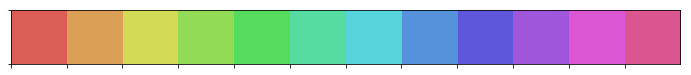

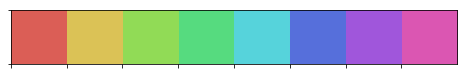

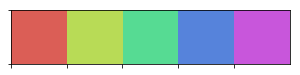

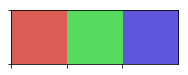

In [4]:
# ----------------------------------------------------------------------
# **Part 2: Set up overall formatting**
# ----------------------------------------------------------------------
# create color palette with 12 colors (for use with monthly data)
twelveColorPalette = sns.color_palette('hls', 12)
twelve = sns.palplot(twelveColorPalette)

# create color palette with 8 colors (for use with weather conditions)
eightColorPalette = sns.color_palette('hls', 8)
eight = sns.palplot(eightColorPalette)

# create color palette with 5 colors (for use with road/light conditions)
fiveColorPalette = sns.color_palette('hls', 5)
five = sns.palplot(fiveColorPalette)

# create color palette with 3 colors (for data by severity)
threeColorPalette = sns.color_palette('hls', 3)
three = sns.palplot(threeColorPalette)

# display color palettes
three
five
eight
twelve

# Basic Data Visualizations

In [5]:
# ----------------------------------------------------------------------
# **Part 2: Basic Data Visualizations**
# This section contains basic data visualizations for the overall 
# dataset without deep analytical goals. 
# ----------------------------------------------------------------------

# ----------------------------------------------------------------------
# Part 2.1: Geographical heatmap
# ----------------------------------------------------------------------


## Count of Traffic Accidents by Month

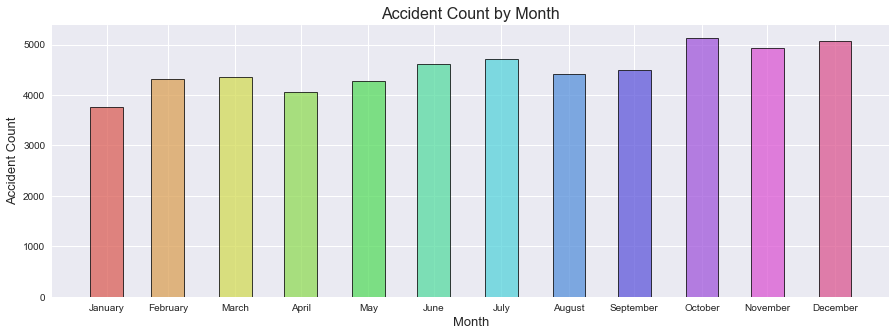

In [6]:
# ----------------------------------------------------------------------
# Part 2.2: Count of Traffic Accidents by Month
# ----------------------------------------------------------------------

# set up list of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 
              'December']

# set up data
trafficDataByMonth_df = traffic_df
trafficDataByMonth_df.index = trafficDataByMonth_df['Date']
trafficDataByMonth_df = pd.DataFrame(trafficDataByMonth_df.resample('M').count()['Accident Index'])
trafficDataByMonth_df = trafficDataByMonth_df.reset_index()[['Date', 
                                                             'Accident Index']]
trafficDataByMonth_df.rename(columns={'Accident Index':'Accident Count'}, 
                             inplace=True )

# set up tick locations
x_axis = trafficDataByMonth_df['Date']
y_axis = trafficDataByMonth_df['Accident Count']

# create bar plot
sns.set()
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(trafficDataByMonth_df['Date'], 
        trafficDataByMonth_df['Accident Count'], 
        color=twelveColorPalette, width=15, align='center', linewidth=1, 
        edgecolor='black', tick_label=month_list, alpha=0.75)
plt.title("Accident Count by Month", size=16)
plt.xlabel("Month", size=13)
plt.ylabel("Accident Count", size=13)
plt.show()

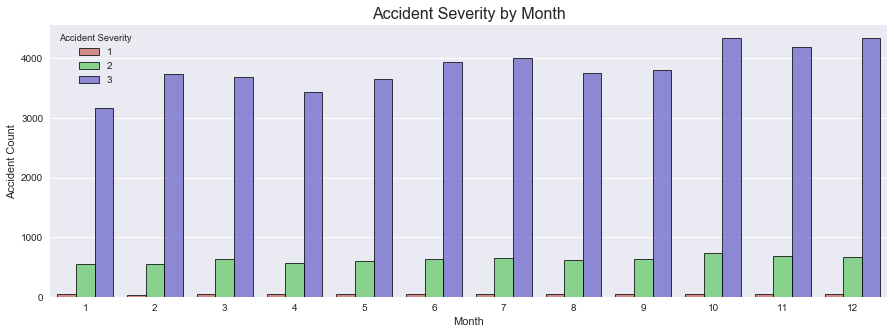

In [8]:
# ----------------------------------------------------------------------
# Part 2.3: Grouped Bar chart of severity by month
# ----------------------------------------------------------------------

# create dataframe holding all data
accSevByMonth_df = traffic_df
accSevByMonth_df.index = accSevByMonth_df['Date']
accSevByMonth_df['Month'] = accSevByMonth_df.index.month
accSevByMonth_df = pd.DataFrame(accSevByMonth_df.\
                                groupby(['Month', 'Accident Severity']).\
                                count()['Accident Index'])
accSevByMonth_df.reset_index(inplace=True)
accSevByMonth_df[['Month', 
                  'Accident Severity', 
                  'Accident Index']]
accSevByMonth_df.rename(columns={'Accident Index':'Accident Count'}, 
                        inplace=True)

# create bar plot
accidentSeverityByMonth_plt = sns.barplot(x='Month', y='Accident Count', 
                                          data=accSevByMonth_df, 
                                          hue='Accident Severity', 
                                          palette=threeColorPalette, 
                                          edgecolor='black', alpha=0.75, 
                                          linewidth=1)
plt.title("Accident Severity by Month", size=16)
plt.show(accidentSeverityByMonth_plt)

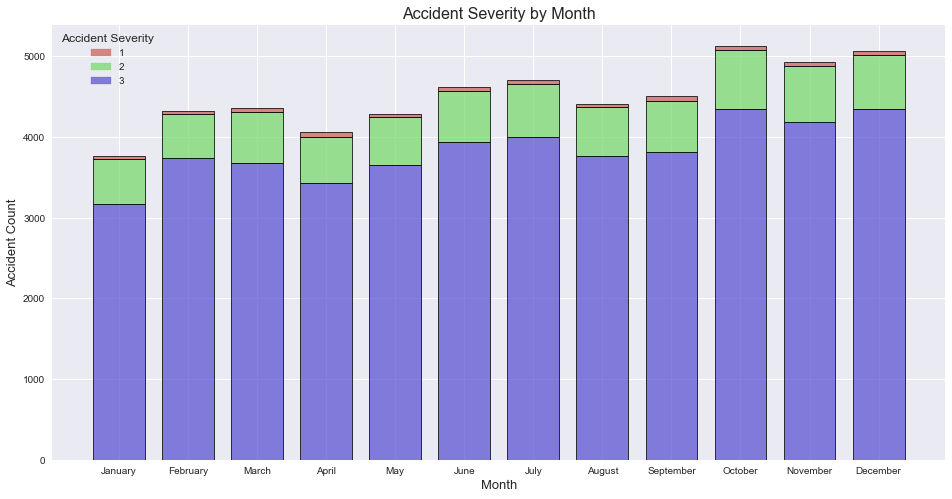

In [9]:
# create base dataframe to work with
accSevByMonth2_df = traffic_df
accSevByMonth2_df.index = accSevByMonth2_df['Date']
accSevByMonth2_df['Month'] = accSevByMonth2_df.index.month

# create three separate dataframes by severity
levelOneByMonth_df = pd.DataFrame(accSevByMonth2_df[accSevByMonth2_df['Accident Severity']==1].\
                                  groupby('Month').count()['Accident Index']).reset_index()
levelTwoByMonth_df = pd.DataFrame(accSevByMonth2_df[accSevByMonth2_df['Accident Severity']==2].\
                                  groupby('Month').count()['Accident Index']).reset_index()
levelThreeByMonth_df = pd.DataFrame(accSevByMonth2_df[accSevByMonth2_df['Accident Severity']==3].\
                                    groupby('Month').count()['Accident Index']).reset_index()

# create stacked bar plot
plt.rcParams["figure.figsize"] = [16,8]
plt.bar(levelThreeByMonth_df['Month'], 
        levelThreeByMonth_df['Accident Index'], 
        color='#5D56D3', width=0.75, align='center', linewidth=1, 
        edgecolor='black', tick_label=month_list, alpha=0.75)
plt.bar(levelTwoByMonth_df['Month'], 
        levelTwoByMonth_df['Accident Index'], 
        bottom=levelThreeByMonth_df['Accident Index'],
        color='#7CD96E', width=0.75, align='center', linewidth=1, 
        edgecolor='black', tick_label=month_list, alpha=0.75)
plt.bar(levelOneByMonth_df['Month'], 
        levelOneByMonth_df['Accident Index'], 
        bottom=[i+j for i,j in zip(levelThreeByMonth_df['Accident Index'], 
                                   levelTwoByMonth_df['Accident Index'])],
        color='#CC655B', width=0.75, align='center', linewidth=1, 
        edgecolor='black', tick_label=month_list, alpha=0.75)

# format bar plot
plt.title("Accident Severity by Month", size=16)
plt.xlabel("Month", size=13)
plt.ylabel("Accident Count", size=13)

# add legend
import matplotlib.patches as mpatches
sev1 = mpatches.Patch(color='#CC655B', label='1', alpha=0.75)
sev2 = mpatches.Patch(color='#7CD96E', label='2', alpha=0.75)
sev3 = mpatches.Patch(color='#5D56D3', label='3', alpha=0.75)
plt.legend(handles=[sev1, sev2, sev3], 
           loc='best', title='Accident Severity')
plt.show()